In [1]:
# Scikit-Learn regression and classification

In [2]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame(index=pd.date_range('2000', '2020'))
df['BookPressure'] = np.random.randn(len(df)) * 2
df['TradePressure'] = np.random.randn(len(df)) * 100
df['RelativeValue'] = np.random.randn(len(df)) * 50
df['Microstructure'] = np.random.randn(len(df)) * 10

true_coefficients = np.random.randint(low=-100, high=101, size=4) / 10
df['PriceChange'] = ((df['BookPressure'] * true_coefficients[0])
+ (df['TradePressure'] * true_coefficients[1])
+ (df['RelativeValue'] * true_coefficients[2])
+ (df['Microstructure'] * true_coefficients[3])
+ (np.random.randn(len(df)) * 200))

df['Price'] = df['PriceChange'].cumsum(0) + 100000

In [4]:
true_coefficients

array([-5.3,  8.8,  8. ,  4.5])

In [5]:
df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price
2000-01-01,-0.297360,-138.895984,-102.431061,-1.234005,-2051.279519,97948.720481
2000-01-02,-0.850199,217.591369,22.242185,11.966211,2151.108616,100099.829096
2000-01-03,0.269709,-130.320898,-18.407560,-6.619248,-1225.854505,98873.974592
2000-01-04,2.275863,-43.481385,64.388994,-13.416540,0.923126,98874.897718
2000-01-05,1.685910,-78.149798,-36.143256,3.187288,-674.234637,98200.663081
...,...,...,...,...,...,...
2019-12-28,0.354935,170.868755,-8.117994,11.567907,1363.785684,182690.024771
2019-12-29,0.339488,26.937519,26.263698,5.951939,728.005436,183418.030207
2019-12-30,-4.041705,25.145570,-16.300188,1.284827,57.854442,183475.884649
2019-12-31,-1.903642,12.691500,-16.927047,3.997150,-68.318517,183407.566133


<Axes: >

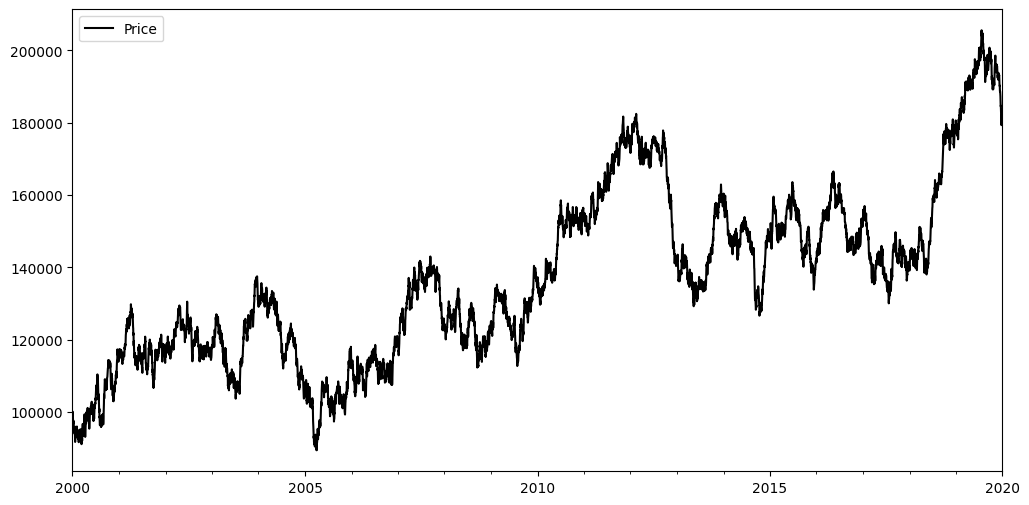

In [6]:
df['Price'].plot(figsize=(12, 6), color='black', legend='Price')

array([[<Axes: xlabel='BookPressure', ylabel='BookPressure'>,
        <Axes: xlabel='TradePressure', ylabel='BookPressure'>,
        <Axes: xlabel='RelativeValue', ylabel='BookPressure'>,
        <Axes: xlabel='Microstructure', ylabel='BookPressure'>,
        <Axes: xlabel='PriceChange', ylabel='BookPressure'>],
       [<Axes: xlabel='BookPressure', ylabel='TradePressure'>,
        <Axes: xlabel='TradePressure', ylabel='TradePressure'>,
        <Axes: xlabel='RelativeValue', ylabel='TradePressure'>,
        <Axes: xlabel='Microstructure', ylabel='TradePressure'>,
        <Axes: xlabel='PriceChange', ylabel='TradePressure'>],
       [<Axes: xlabel='BookPressure', ylabel='RelativeValue'>,
        <Axes: xlabel='TradePressure', ylabel='RelativeValue'>,
        <Axes: xlabel='RelativeValue', ylabel='RelativeValue'>,
        <Axes: xlabel='Microstructure', ylabel='RelativeValue'>,
        <Axes: xlabel='PriceChange', ylabel='RelativeValue'>],
       [<Axes: xlabel='BookPressure', ylabel='Mi

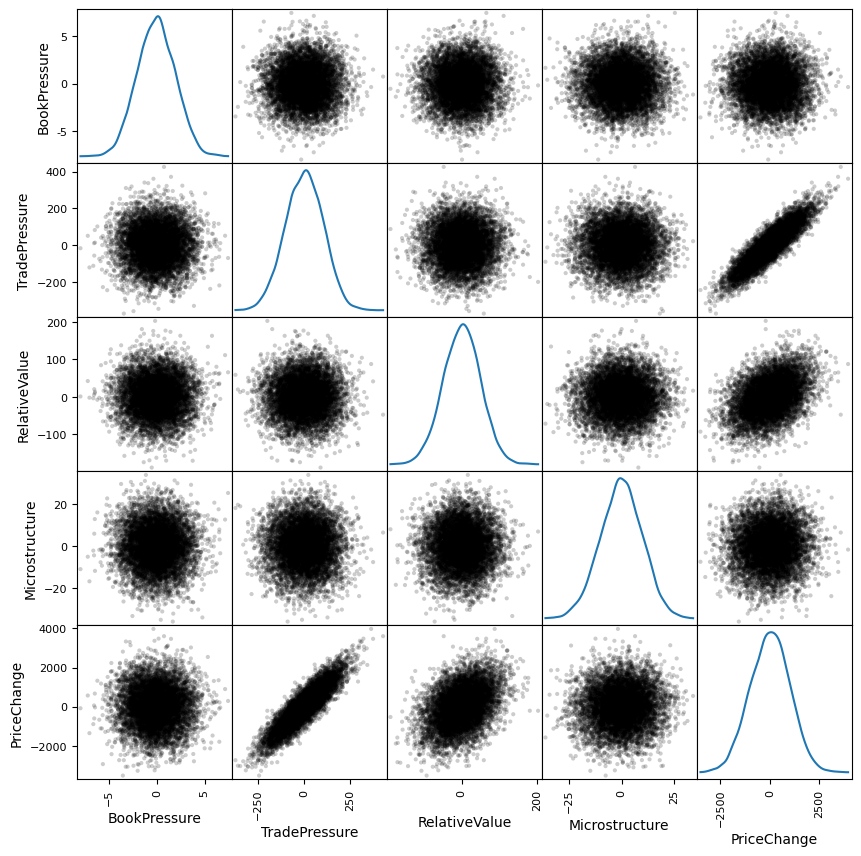

In [7]:
pd.plotting.scatter_matrix(df.drop('Price', axis=1), color='black', alpha=0.2, grid=True, diagonal='kde', figsize=(10, 10))

In [8]:
# Regression

In [9]:
features = df[['BookPressure', 'TradePressure', 'RelativeValue', 'Microstructure']]
target = df['PriceChange']

In [10]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(features, target)

RidgeCV()

In [11]:
true_coefficients, ridge.coef_

(array([-5.3,  8.8,  8. ,  4.5]),
 array([-4.54389005,  8.79553968,  7.9728078 ,  4.40422817]))

In [12]:
ridge.score(features, target)

0.9602413678788363

In [13]:
df['PredPrice'] = ridge.predict(features).cumsum(0) + 100000; df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price,PredPrice
2000-01-01,-0.297360,-138.895984,-102.431061,-1.234005,-2051.279519,97948.720481,97958.281512
2000-01-02,-0.850199,217.591369,22.242185,11.966211,2151.108616,100099.829096,100106.706312
2000-01-03,0.269709,-130.320898,-18.407560,-6.619248,-1225.854505,98873.974592,98784.019027
2000-01-04,2.275863,-43.481385,64.388994,-13.416540,0.923126,98874.897718,98846.200555
2000-01-05,1.685910,-78.149798,-36.143256,3.187288,-674.234637,98200.663081,97877.738101
...,...,...,...,...,...,...,...
2019-12-28,0.354935,170.868755,-8.117994,11.567907,1363.785684,182690.024771,183346.526009
2019-12-29,0.339488,26.937519,26.263698,5.951939,728.005436,183418.030207,183818.216024
2019-12-30,-4.041705,25.145570,-16.300188,1.284827,57.854442,183475.884649,183934.143835
2019-12-31,-1.903642,12.691500,-16.927047,3.997150,-68.318517,183407.566133,183937.764115


<Axes: >

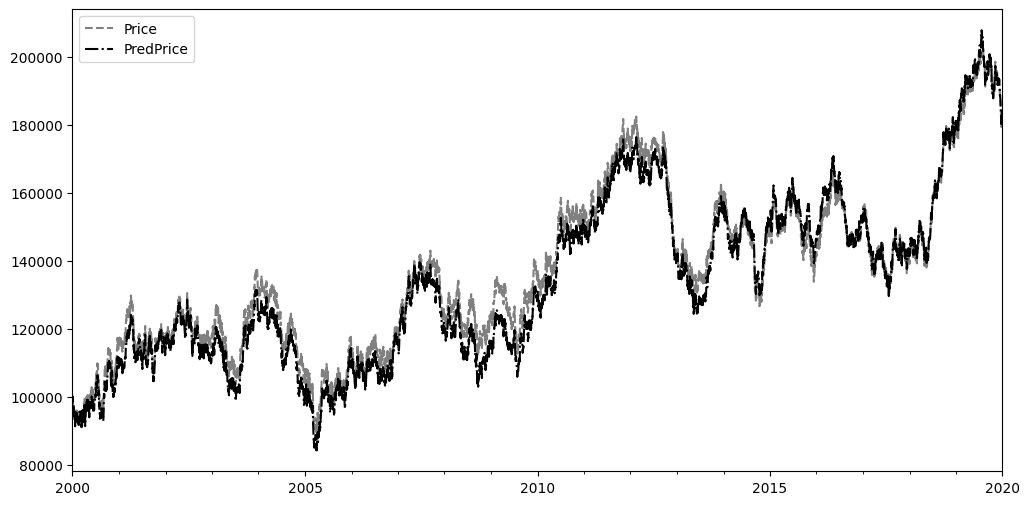

In [14]:
df['Price'].plot(figsize=(12, 6), color='gray', linestyle='--', legend='Price')
df['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

<Axes: >

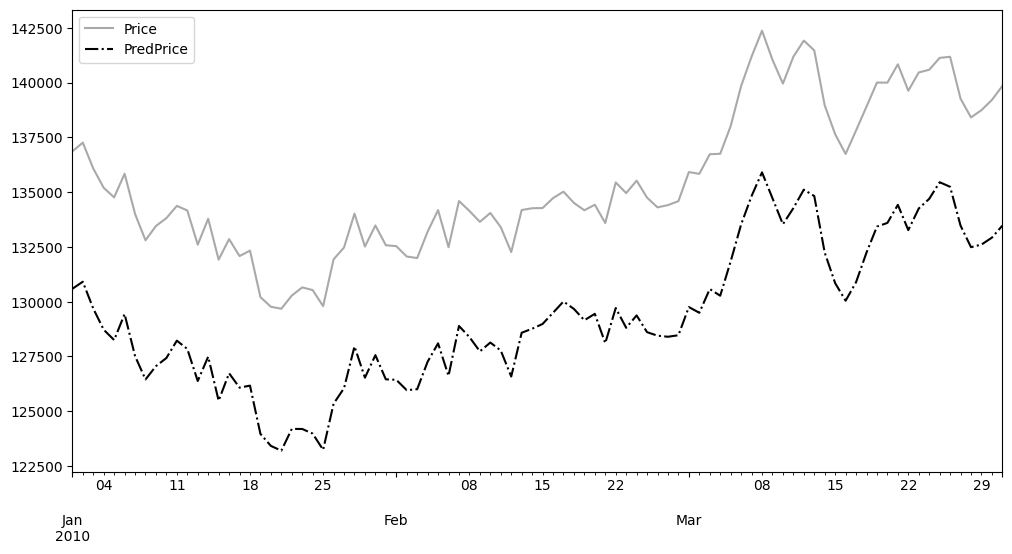

In [15]:
df['Price'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredPrice'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

<Axes: ylabel='Density'>

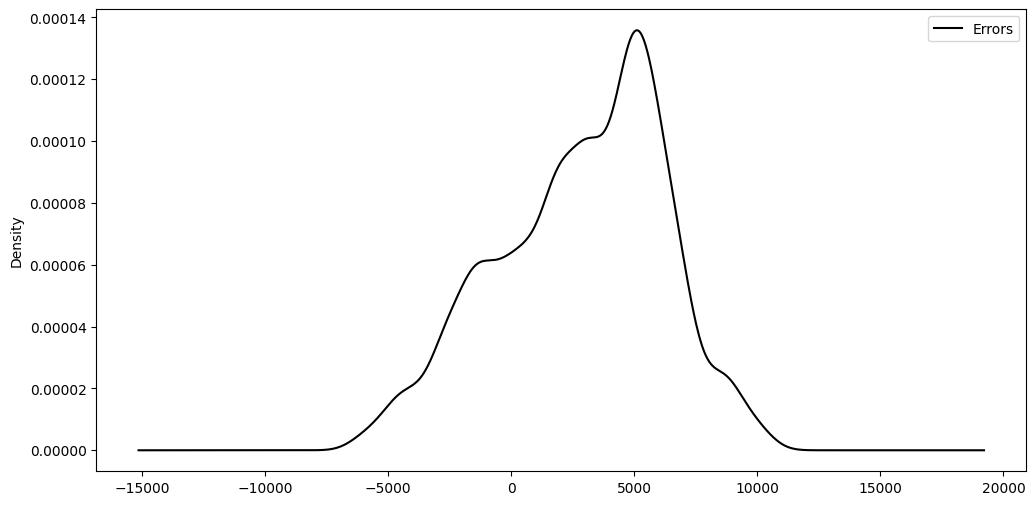

In [16]:
df['Errors'] = df['Price'] - df['PredPrice']
df['Errors'].plot(figsize=(12, 6), kind='kde', color='black', legend='Errors')

In [17]:
# Classification

In [18]:
target_discrete = pd.cut(target, bins=5, labels=[-2, -1, 0, 1, 2]).astype(int); target_discrete

2000-01-01   -2
2000-01-02    1
2000-01-03   -1
2000-01-04    0
2000-01-05   -1
             ..
2019-12-28    1
2019-12-29    0
2019-12-30    0
2019-12-31    0
2020-01-01    0
Freq: D, Name: PriceChange, Length: 7306, dtype: int64

<Axes: ylabel='Frequency'>

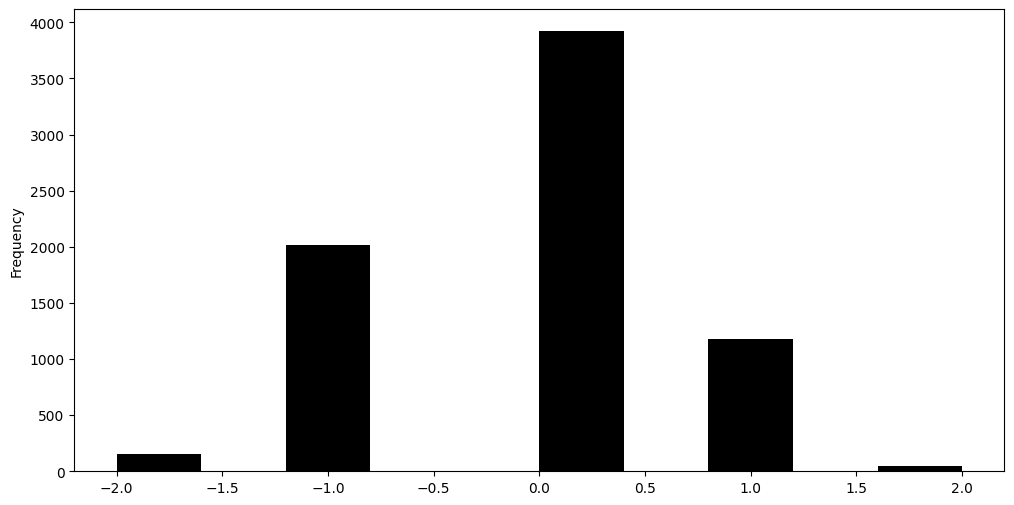

In [19]:
target_discrete.plot(figsize=(12, 6), kind='hist', color='black')

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(features, target_discrete)

RandomForestClassifier(max_depth=5)

In [21]:
rf.score(features, target_discrete)

0.8744867232411716

In [22]:
df['DiscretePriceChange'] = target_discrete
df['PredDiscretePriceChange'] = rf.predict(features)
df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price,PredPrice,Errors,DiscretePriceChange,PredDiscretePriceChange
2000-01-01,-0.297360,-138.895984,-102.431061,-1.234005,-2051.279519,97948.720481,97958.281512,-9.561031e+00,-2,-1
2000-01-02,-0.850199,217.591369,22.242185,11.966211,2151.108616,100099.829096,100106.706312,-6.877216e+00,1,1
2000-01-03,0.269709,-130.320898,-18.407560,-6.619248,-1225.854505,98873.974592,98784.019027,8.995557e+01,-1,-1
2000-01-04,2.275863,-43.481385,64.388994,-13.416540,0.923126,98874.897718,98846.200555,2.869716e+01,0,0
2000-01-05,1.685910,-78.149798,-36.143256,3.187288,-674.234637,98200.663081,97877.738101,3.229250e+02,-1,-1
...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.354935,170.868755,-8.117994,11.567907,1363.785684,182690.024771,183346.526009,-6.565012e+02,1,1
2019-12-29,0.339488,26.937519,26.263698,5.951939,728.005436,183418.030207,183818.216024,-4.001858e+02,0,0
2019-12-30,-4.041705,25.145570,-16.300188,1.284827,57.854442,183475.884649,183934.143835,-4.582592e+02,0,0
2019-12-31,-1.903642,12.691500,-16.927047,3.997150,-68.318517,183407.566133,183937.764115,-5.301980e+02,0,0


<Axes: >

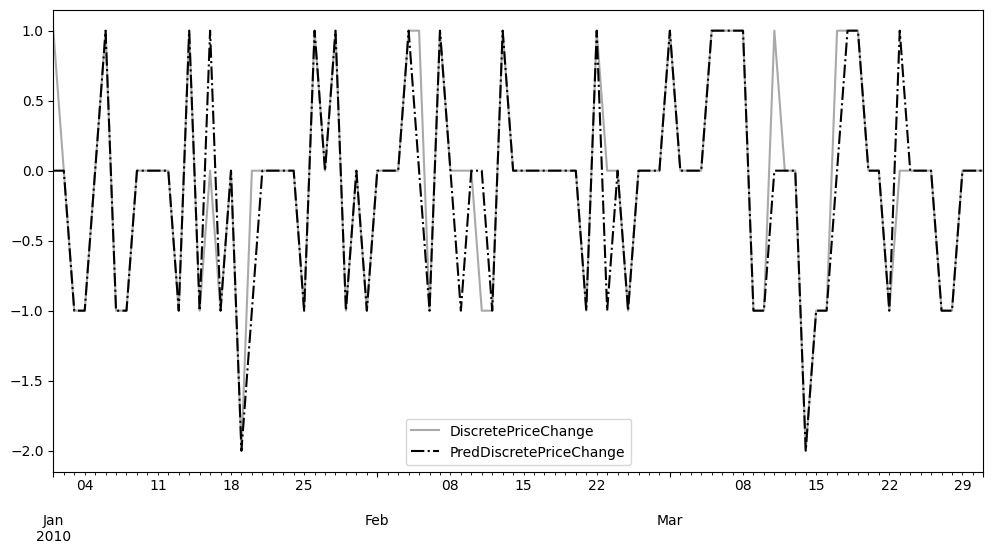

In [23]:
df['DiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredDiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

<Axes: ylabel='Density'>

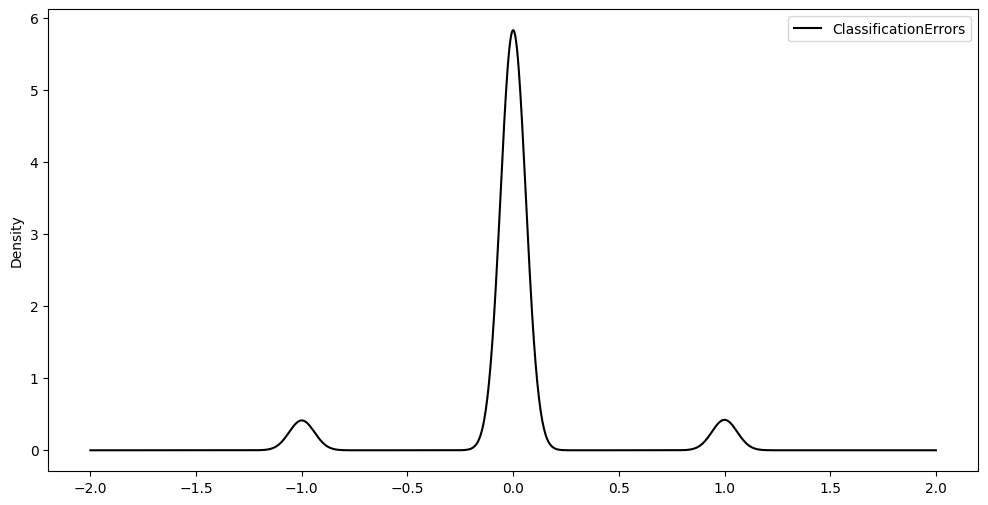

In [24]:
df['ClassificationErrors'] = df['DiscretePriceChange'] - df['PredDiscretePriceChange']
df['ClassificationErrors'].plot(figsize=(12, 6), kind='kde', color='black', legend='ClassificationErrors')